In [1]:
from glob import glob
from tqdm import tqdm
import numpy as np
import json
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import torch
import os
import ast
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from transformers import EarlyStoppingCallback
from transformers import AutoConfig, AutoModel, AutoModelForSequenceClassification, AutoTokenizer

In [3]:
model_name = 'xlnet-base-cased'

''' tokenizer and pretrained model 불러오기 '''
tokenizer = AutoTokenizer.from_pretrained(model_name)

config = AutoConfig.from_pretrained(model_name, num_labels=6)
#model = AutoModelForSequenceClassification.from_config(config)
model = AutoModel.from_config(config)

In [4]:
from main_code.model import classification_model

In [5]:
model = classification_model(model, config, num_classifier=2)

In [18]:
from main_code import run
from main_code.run import NLP_classification

model_name = 'xlnet-base-cased'
data_file = './1.tutorial/check.csv'

dropout=0.1
lr=1e-5
batch_size=1
random_state=1000
epochs=50
data_cut=100
max_length=128
task_type='scalar'
freeze_layers=3 
num_classifier=2

trainer = NLP_classification(model_name=model_name, max_length=max_length, random_state=random_state, task_type=task_type, freeze_layers=freeze_layers, num_classifier=num_classifier)
model = trainer.training(data_file, epochs=epochs, batch_size=batch_size, lr=lr, dropout=dropout, data_cut=data_cut)

In [21]:
for layer in model.pretrained_model.base_model.layer:
    for param in layer.parameters():
        print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

In [3]:
import pandas as pd
df = pd.read_csv('Datasets/check.csv')
length_list=[len(df.iloc[i,0]) for i in range(len(df))]
df['length'] = length_list

(0.0, 100.0)

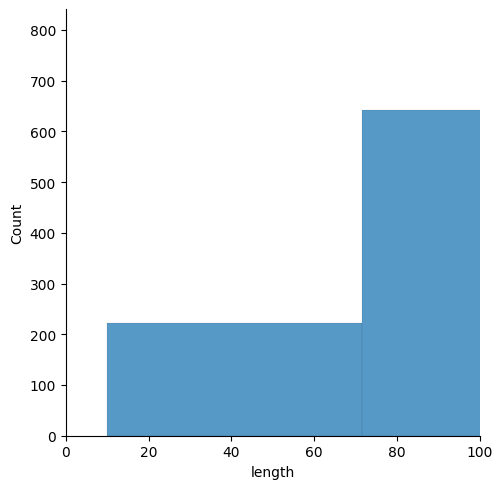

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(x='length', data=df)
plt.xlim(0,100)

In [10]:
df = df.sort_values(by=['length'])
df.head(50)

,Para,Category,length
6385,4. Summary,Summary,10
15627,"[1,0,3,0,0,0]",Abstract,13
7987,2.1. Overview,Main,13
15625,"[0,1,5,0,0,0]",Abstract,13
15624,"[0,1,3,0,0,0]",Abstract,13
15623,"[0,1,3,0,0,0]",Abstract,13
15622,"[0,0,5,0,0,0]",Abstract,13
15628,"[1,1,4,0,1,0]",Abstract,13
15620,"[0,2,9,0,1,0]",Abstract,13
15626,"[1,2,10,0,0,0]",Abstract,14
